In [1]:
import os

import scipy
import pandas as pd
import numpy as np
#import json

In [2]:
all_data = pd.read_pickle("all_data.pkl")
all_data = all_data[all_data['DstIP'].notna()]
all_data = all_data[all_data['DstIP'] != "Dial"]
all_data = all_data.drop(columns=['Unnamed: 0'])


In [3]:
# Preprocessing steps: normalize IP addresses and specify particular country data
def normalize_ips(ip):
    if "read" in ip:
        start = ip.find(">") + 1
        end = ip.find(":", start + 1)
        return ip[start:end]
    return ip
all_data["DstIP"] = all_data["DstIP"].apply(normalize_ips)
country_clusters = ["ru", "az", "kz", "by"]
country_data = all_data[all_data["Country"].isin(country_clusters)]
df = country_data

In [4]:
display(df)

,DstIP,DstASN,Country,Domain,Protocol,MeasurementType,TraceTestID,ResultCode,TTLDifference,CensorT_TTL,...,Error,CensoredResponseType,UncensoredRequest,UncensoredRequestStrategy,UncensoredError,UncensoredResponseType,OpenPorts,ServicesOpen,NMapLabel,FinalLabel
0,195.182.132.130,0,ru,ultrasurf.us,http,remote,ultrasurf.us-ru-195.182.132.130-remote-982,ResponseCode.NAT_FIREWALL,1.0,21,...,NaN,noerror/noerror,GET / TP/1\r\nHost:example.com\r\n\r\n,TP/1\r\nHost:example.com\r\n\r\n,NaN,noerror/noerror,"[[21, ""ftp""], [25, ""smtp""], [53, ""domain""], [8...","['FTP', 'SMTP-STARTTLS', 'DNS', 'HTTP', 'HTTP'...",NaN,NaN
1,195.182.132.130,0,ru,ultrasurf.us,http,remote,ultrasurf.us-ru-195.182.132.130-remote-982,ResponseCode.NAT_FIREWALL,1.0,21,...,NaN,noerror/noerror,GET / HTTP/1.1\r\noexample.com\r\n\r\n,oexample.com\r\n\r\n,NaN,noerror/noerror,"[[21, ""ftp""], [25, ""smtp""], [53, ""domain""], [8...","['FTP', 'SMTP-STARTTLS', 'DNS', 'HTTP', 'HTTP'...",NaN,NaN
2,195.182.132.130,0,ru,ultrasurf.us,http,remote,ultrasurf.us-ru-195.182.132.130-remote-982,ResponseCode.NAT_FIREWALL,1.0,21,...,NaN,noerror/noerror,GET / HP/.\r\nHost:example.com\r\n\r\n,HP/.\r\nHost:example.com\r\n\r\n,NaN,noerror/noerror,"[[21, ""ftp""], [25, ""smtp""], [53, ""domain""], [8...","['FTP', 'SMTP-STARTTLS', 'DNS', 'HTTP', 'HTTP'...",NaN,NaN
3,195.182.132.130,0,ru,ultrasurf.us,http,remote,ultrasurf.us-ru-195.182.132.130-remote-982,ResponseCode.NAT_FIREWALL,1.0,21,...,NaN,noerror/noerror,GET / H/.\r\nHost:example.com\r\n\r\n,H/.\r\nHost:example.com\r\n\r\n,NaN,noerror/noerror,"[[21, ""ftp""], [25, ""smtp""], [53, ""domain""], [8...","['FTP', 'SMTP-STARTTLS', 'DNS', 'HTTP', 'HTTP'...",NaN,NaN
4,195.182.132.130,0,ru,ultrasurf.us,http,remote,ultrasurf.us-ru-195.182.132.130-remote-982,ResponseCode.NAT_FIREWALL,1.0,21,...,NaN,noerror/noerror,GET / T.\r\nHost:example.com\r\n\r\n,T.\r\nHost:example.com\r\n\r\n,NaN,noerror/noerror,"[[21, ""ftp""], [25, ""smtp""], [53, ""domain""], [8...","['FTP', 'SMTP-STARTTLS', 'DNS', 'HTTP', 'HTTP'...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114805,62.128.105.105,3327,ru,www.instagram.com,https,remote,www.instagram.com-ru-62.128.105.105-remote-244,ResponseCode.NO_OBSERVED_CENSORSHIP,0.0,21,...,NaN,noerror/noerror,forum.example.com,forum.example.com,NaN,noerror/noerror,NaN,NaN,NaN,NaN
114828,79.172.16.39,207103,ru,ultrasurf.us,https,remote,ultrasurf.us-ru-79.172.16.39-remote-193,ResponseCode.NO_OBSERVED_CENSORSHIP,0.0,17,...,NaN,noerror/noerror,example.me,example.me,NaN,noerror/noerror,NaN,NaN,NaN,NaN
114829,79.172.16.39,207103,ru,svoboda.org,https,remote,svoboda.org-ru-79.172.16.39-remote-463,ResponseCode.ENDPOINT_FIREWALL,0.0,17,...,NaN,noerror/noerror,NaN,NaN,NaN,noerror/noerror,NaN,NaN,NaN,NaN
114830,79.172.16.39,207103,ru,www.instagram.com,http,remote,www.instagram.com-ru-79.172.16.39-remote-665,ResponseCode.NO_OBSERVED_CENSORSHIP,0.0,17,...,NaN,noerror/noerror,GET / HTTP/1.1\r\nHost:example.com\r\nPragma: ...,GET / HTTP/1.1\r\nHost:example.com\r\nPragma: ...,NaN,noerror/noerror,NaN,NaN,NaN,NaN


## Importing & reading all (labelled) data
Assumes directory of unzipped Bigquery data

In [90]:
DIRECTORY = "data/bigquery"
SMALLER_DIRECTORY = "data/bigquery_processed"

LABEL_FILE = "labels.csv"

f = []
for (dirpath, dirnames, filenames) in os.walk(DIRECTORY):
    f.extend(filenames)
    break
filenames = [os.path.join(DIRECTORY, filename) for filename in f]
filenames = sorted(filenames)
labeldata = pd.read_csv(LABEL_FILE)


In [92]:
# other_irrelevant_columns = ["Response", "UncensoredResponse", "MiddleboxASName", 'PreviousMiddleboxIP', 'PreviousMiddleboxASN', 'PreviousMiddleboxCountry', 'MiddleboxIP', 'MiddleboxASN', 'MiddleboxCountry', 'NextMiddleboxIP', 'NextMiddleboxASN', 'NextMiddleboxCountry']

# cutting down on dataset size
# go thru each file and discard columns unneeded for feature extraction

# dfs = []
# count = 0
# for filename in filenames:
#     count += 1
#     print(count)
#     if count % 10 == 0:
#         path = os.path.join(SMALLER_DIRECTORY, os.path.basename(filename))
#         pd.concat(dfs).to_csv(path)
#         dfs = []
#     print(f"Reading {filename}...")
#     df = pd.read_csv(filename, low_memory=False) # TODO: explicitly specify dtypes to make this run much faster
#     application_columns = [col for col in list(df.columns) if col.startswith("Censys") or col.startswith("Zgrab") ]
#     df = df.drop(application_columns + other_irrelevant_columns, 1)
#     dfs.append(df)

# SMALLER_DIRECTORY = "data/bigquery_processed"
# combine all the resultant processed files into one big pickle

# f = []
# for (dirpath, dirnames, filenames) in os.walk(SMALLER_DIRECTORY):
#     f.extend(filenames)
#     break
# filenames = [os.path.join(SMALLER_DIRECTORY, filename) for filename in f]
# filenames = sorted(filenames)
# dfs = []
# for filename in filenames:
#     dfs.append(pd.read_csv(filename, low_memory=False))
# dfs = pd.concat(dfs)
# dfs.to_pickle("all_data.pkl")

1
Reading data/bigquery/tfa_000000000000...


/var/folders/7m/46jyljz124v8_cyr2_dkqcxh0000gn/T/ipykernel_37137/1358261113.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(application_columns + other_irrelevant_columns, 1)


2
Reading data/bigquery/tfa_000000000001...
3
Reading data/bigquery/tfa_000000000002...
4
Reading data/bigquery/tfa_000000000003...
5
Reading data/bigquery/tfa_000000000004...
6
Reading data/bigquery/tfa_000000000005...
7
Reading data/bigquery/tfa_000000000006...
8
Reading data/bigquery/tfa_000000000007...
9
Reading data/bigquery/tfa_000000000008...
10
Reading data/bigquery/tfa_000000000009...
11
Reading data/bigquery/tfa_000000000010...
12
Reading data/bigquery/tfa_000000000011...
13
Reading data/bigquery/tfa_000000000012...
14
Reading data/bigquery/tfa_000000000013...
15
Reading data/bigquery/tfa_000000000014...
16
Reading data/bigquery/tfa_000000000015...
17
Reading data/bigquery/tfa_000000000016...
18
Reading data/bigquery/tfa_000000000017...
19
Reading data/bigquery/tfa_000000000018...
20
Reading data/bigquery/tfa_000000000019...
21
Reading data/bigquery/tfa_000000000020...
22
Reading data/bigquery/tfa_000000000021...
23
Reading data/bigquery/tfa_000000000022...
24
Reading data/bi

183
Reading data/bigquery/tfa_000000000182...
184
Reading data/bigquery/tfa_000000000183...
185
Reading data/bigquery/tfa_000000000184...
186
Reading data/bigquery/tfa_000000000185...
187
Reading data/bigquery/tfa_000000000186...
188
Reading data/bigquery/tfa_000000000187...
189
Reading data/bigquery/tfa_000000000188...
190
Reading data/bigquery/tfa_000000000189...
191
Reading data/bigquery/tfa_000000000190...
192
Reading data/bigquery/tfa_000000000191...
193
Reading data/bigquery/tfa_000000000192...
194
Reading data/bigquery/tfa_000000000193...
195
Reading data/bigquery/tfa_000000000194...
196
Reading data/bigquery/tfa_000000000195...
197
Reading data/bigquery/tfa_000000000196...
198
Reading data/bigquery/tfa_000000000197...
199
Reading data/bigquery/tfa_000000000198...
200
Reading data/bigquery/tfa_000000000199...
201
Reading data/bigquery/tfa_000000000200...
202
Reading data/bigquery/tfa_000000000201...
203
Reading data/bigquery/tfa_000000000202...
204
Reading data/bigquery/tfa_0000

362
Reading data/bigquery/tfa_000000000361...
363
Reading data/bigquery/tfa_000000000362...
364
Reading data/bigquery/tfa_000000000363...
365
Reading data/bigquery/tfa_000000000364...
366
Reading data/bigquery/tfa_000000000365...
367
Reading data/bigquery/tfa_000000000366...
368
Reading data/bigquery/tfa_000000000367...
369
Reading data/bigquery/tfa_000000000368...
370
Reading data/bigquery/tfa_000000000369...
371
Reading data/bigquery/tfa_000000000370...
372
Reading data/bigquery/tfa_000000000371...
373
Reading data/bigquery/tfa_000000000372...
374
Reading data/bigquery/tfa_000000000373...
375
Reading data/bigquery/tfa_000000000374...
376
Reading data/bigquery/tfa_000000000375...
377
Reading data/bigquery/tfa_000000000376...
378
Reading data/bigquery/tfa_000000000377...
379
Reading data/bigquery/tfa_000000000378...
380
Reading data/bigquery/tfa_000000000379...
381
Reading data/bigquery/tfa_000000000380...
382
Reading data/bigquery/tfa_000000000381...
383
Reading data/bigquery/tfa_0000

In [28]:
def get_label(row):
    possible_labels = [row.CensysLabel, row.ZgrabLabel, row.Signature]
    for label in possible_labels:
        if not pd.isnull(label):
            return label
    return label

labeldata["Label"] = labeldata.apply(get_label, axis=1)
#display(labeldata)

labelled_ips = labeldata["DstIP"].unique()

labelmap = dict(zip(labeldata.DstIP, labeldata.Label))


In [29]:
# Extract labelled dataset from BigQuery folder
LABELLED_DATAFILE = "labelled_data.pkl"
all_ips = set()
labelled_df = None
try:
    labelled_df = pd.read_pickle(LABELLED_DATAFILE)
except:
    labelled_df = None
if labelled_df is None:
    for filename in filenames:
        print(f"Reading {filename}...")
        df = pd.read_csv(filename, low_memory=False) # TODO: explicitly specify dtypes to make this run much faster
        df = df[df["DstIP"].isin(labelled_ips)]
        all_ips.update(list(df["DstIP"].unique()))
        if labelled_df is None:
            labelled_df = df
        else:
            labelled_df = pd.concat([labelled_df, df])

    print(f"Unique IPs: {len(labelled_df['DstIP'].unique())}")


In [30]:
labelled_df["FinalLabel"] = labelled_df["DstIP"].map(labelmap)
display(labelled_df)
labelled_df.to_pickle("labelled_data.pkl")

,DstIP,DstASN,Country,Domain,Protocol,MeasurementType,TraceTestID,ResultCode,TTLDifference,CensorT_TTL,...,ZgrabHTTPBody,ZgrabSSHServer,ZgrabSSHVersion,ZgrabSSHSoftware,ZgrabFTPBanner,ZgrabSMTPBanner,ZgrabTelnetBanner,ZgrabLabel,ZgrabLabelMatchedFeature,FinalLabel
195,181.49.166.233,14080,co,www.tumblr.com,http,blockpage,www.tumblr.com-co-181.49.166.233-blockpage-214,ResponseCode.ENDPOINT_FIREWALL,0,19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a_prod_fortinet_2
196,181.49.166.233,14080,co,livejournal.com,http,blockpage,livejournal.com-co-181.49.166.233-blockpage-563,ResponseCode.ENDPOINT_FIREWALL,0,19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a_prod_fortinet_2
197,181.49.166.233,14080,co,mega.co.nz,http,blockpage,mega.co.nz-co-181.49.166.233-blockpage-473,ResponseCode.ENDPOINT_FIREWALL,0,19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a_prod_fortinet_2
198,181.49.166.233,14080,co,www.shazam.com,http,blockpage,www.shazam.com-co-181.49.166.233-blockpage-438,ResponseCode.ENDPOINT_FIREWALL,0,19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a_prod_fortinet_2
199,181.49.166.233,14080,co,mega.co.nz,http,blockpage,mega.co.nz-co-181.49.166.233-blockpage-473,ResponseCode.ENDPOINT_FIREWALL,0,19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a_prod_fortinet_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11396,213.33.51.105,8447,at,cannabis.com,http,blockpage,cannabis.com-at-213.33.51.105-blockpage-855,ResponseCode.ENDPOINT_FIREWALL,0,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a_prod_fortinet_1
11397,213.33.51.105,8447,at,www.torproject.org,http,blockpage,www.torproject.org-at-213.33.51.105-blockpage-350,ResponseCode.ENDPOINT_FIREWALL,0,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a_prod_fortinet_1
11398,213.33.51.105,8447,at,www.dit-inc.us,http,blockpage,www.dit-inc.us-at-213.33.51.105-blockpage-290,ResponseCode.ENDPOINT_FIREWALL,0,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a_prod_fortinet_1
11399,213.33.51.105,8447,at,www.dit-inc.us,http,blockpage,www.dit-inc.us-at-213.33.51.105-blockpage-290,ResponseCode.ENDPOINT_FIREWALL,0,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a_prod_fortinet_1


## Data preprocessing


In [31]:
from sklearn import preprocessing

In [16]:

# Drop application-layer columns
all_columns = labelled_df.columns
application_columns = [col for col in list(df.columns) if col.startswith("Censys") or col.startswith("Zgrab") ]
other_irrelevant_columns = ["MiddleboxASName", 'PreviousMiddleboxIP', 'PreviousMiddleboxASN', 'PreviousMiddleboxCountry', 'MiddleboxIP', 'MiddleboxASN', 'MiddleboxCountry', 'NextMiddleboxIP', 'NextMiddleboxASN', 'NextMiddleboxCountry']
df = labelled_df.drop(application_columns + other_irrelevant_columns, 1)

/var/folders/7m/46jyljz124v8_cyr2_dkqcxh0000gn/T/ipykernel_37137/3290091354.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = labelled_df.drop(application_columns + other_irrelevant_columns, 1)


195      19.0
196      19.0
197      19.0
198      19.0
199      19.0
         ... 
11396    15.0
11397    15.0
11398    15.0
11399    15.0
11400    15.0
Length: 1396696, dtype: float64


In [8]:
import json

# Process TTL data
def extract_tracebox(censor_t_ttl, all_differences):
    censor_t_ttl = int(censor_t_ttl)
    all_differences = json.loads(all_differences)
    if np.isnan(censor_t_ttl) or len(all_differences) == 0:
        return False, False
    all_ttls = [int(k) for k in all_differences.keys()]
    if censor_t_ttl > max(all_ttls):
        return False, False #str(censor_t_ttl) + ":" + str(max(all_ttls))
    after_censor_ttl = censor_t_ttl
    while str(after_censor_ttl) not in all_differences or all_differences[str(after_censor_ttl)] is None:
        after_censor_ttl += 1
        if after_censor_ttl > max(all_ttls):
            return False, False
    after_tracebox = all_differences[str(after_censor_ttl)]
    before_censor_ttl = censor_t_ttl - 1
    while str(before_censor_ttl) not in all_differences or all_differences[str(before_censor_ttl)] is None:
        before_censor_ttl -= 1
    before_tracebox = all_differences[str(before_censor_ttl)]
    diff = set(after_tracebox) - set(before_tracebox)
    if len(diff) == 0:
        return False, False
    # return all differences
    # return json.dumps(list(diff))
    return "IP::TOS" in diff, "IP::Flags" in diff

df[["IPTOSChanged", "IPFlagsChanged"]] = df.apply(lambda x: extract_tracebox(x.CensorT_TTL, x.AllDifferences), axis=1, result_type="expand")
# print(df["IPTOSChanged"].sum())
# print(df["IPFlagsChanged"].sum())

KeyboardInterrupt: 

In [39]:
# This retrieves the % of tests that "Match Normal" per each test.
from sklearn.preprocessing import OrdinalEncoder

df_data = df.groupby(["DstIP", "TestName"]).MatchesNormal.apply(np.mean).unstack(level=-1).reset_index()

labels = ["cisco", "fortinet", "watchguard", "bitrix"]

def fingerprint_to_label(fingerprint):
    for label in labels:
        if label in fingerprint:
            return label
    return "other"
#display(df_data)
other_features = (df.groupby(["DstIP"]).agg({"CensorResponse": lambda x: pd.Series.mode(x)[0],
                                             "TTLDifference": "median",
                                             "OnPath": "median",
#                                              "IPTOSChanged": "median",
#                                              "IPFlagsChanged": "median",
                                            }))

# other_features = OrdinalEncoder().fit_transform(other_features)
df_data = df_data.join(other_features, on="DstIP")

#display(df_data)

# df_data["Distance to middlebox"] = df.groupby(["DstIP"]).TTLDifference.apply(np.median)
# df_data["On path"] = df.groupby(["DstIP"]).OnPath.apply(np.median)

df_data = df_data.set_index("DstIP")
display(df_data)


,CipherSuite Alternate,Client Certificate Alternate,Get Word | Alternate,Get Word | Capitalize,Get Word | Remove,Header | Alternate,Host Word | Alternate,Host Word | Capitalize,Host Word | Remove,Hostname Alternate,...,Min Version Alternate,Normal,Path | Alternate,SNI Alternate,SNI Padding,SNI Subdomain Alternate,SNI TLD Alternate,CensorResponse,TTLDifference,OnPath
DstIP,,,,,,,,,,,,,,,,,,,,,
104.16.100.49,0.000000,0.000000,0.083333,0.187500,0.071429,0.144068,0.071429,0.1250,0.000000,0.000000,...,0.000000,0.50,0.1875,0.0000,0.000000,0.000000,0.000000,HTTP,-1.5,0.0
104.16.117.30,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.00,NaN,0.0000,0.000000,0.000000,0.000000,TIMEOUT,-4.0,0.0
104.16.118.30,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.00,NaN,0.0000,0.000000,0.000000,0.000000,TIMEOUT,-4.0,0.0
104.16.99.49,0.000000,0.000000,0.166667,0.000000,0.071429,0.152542,0.071429,0.1875,0.007968,0.000000,...,0.000000,0.75,0.1250,0.0000,0.000000,0.000000,0.000000,TIMEOUT,-3.0,0.0
104.18.109.96,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.00,NaN,0.0000,0.000000,0.000000,0.000000,TIMEOUT,-4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95.213.247.223,0.040000,1.000000,0.833333,0.125000,1.000000,0.976190,0.142857,0.9875,0.031949,0.600000,...,0.700000,1.00,0.0000,0.7500,0.955556,0.860000,0.900000,HTTP,0.0,0.0
95.215.177.133,0.040094,0.996721,0.166807,0.125316,0.143478,0.881344,0.142341,1.0000,0.031740,0.799392,...,0.746929,1.00,0.0000,0.7543,0.997819,0.899705,0.803536,FIN,1.0,0.0
95.215.230.11,NaN,NaN,0.833333,0.125000,1.000000,0.948276,0.142857,1.0000,0.031746,0.000000,...,NaN,1.00,0.0000,NaN,NaN,NaN,NaN,HTTP,0.0,0.0


In [ ]:


# df_labels = df.groupby("DstIP")["FinalLabel"].apply(lambda e: min(e, key=len)).reset_index(name="labels")
df_labels = df_labels[df_labels.DstIP.isin(list(df_data["DstIP"]))]

df_labels["labels"] = df_labels["labels"].map(fingerprint_to_label)
df_labels = df_labels.set_index("DstIP")
display(df_labels["labels"].value_counts())


In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

df_data["CensorResponse"] = LabelEncoder().fit_transform(df_data["CensorResponse"])

# Impute data 
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy="mean")
imputed = imp.fit_transform(df_data)


In [72]:
# Model evaluation & selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC



# Hyperparameter selection
# defining parameter range
# param_grid = {'C': [0.1, 1, 10, 100, 1000],
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['linear']}

param_grid = {'n_estimators': [100, 200],
              'max_depth': [10, 20, 100, None],
              'max_features': ['auto', 'sqrt', None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4, 10],
              'bootstrap': [True, False],
              'criterion': ['gini', 'entropy']}

# param_grid = {'C': [0.1, 1, 10, 100, 1000],}
grid = GridSearchCV(estimator = RandomForestClassifier(),#multi_class='multinomial', solver='lbfgs'),
                    param_grid=param_grid, cv=5, scoring="f1_macro")

grid_result = grid.fit(imputed, df_labels.values.ravel())
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
#X_train, X_test, y_train, y_test = train_test_split(imputed, df_labels)
best_params = grid_result.best_params_
# Best: 0.292857 using {'C': 0.1, 'max_iter': 75, 'penalty': 'l2'}

Best: 0.574502 using {'bootstrap': True, 'criterion': 'gini', 'max_depth': 100, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [73]:
# Feature importance using best model

from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
(imputed)
#clf = LogisticRegression(multi_class="multinomial", penalty="l2", C=1).fit(imputed, df_labels)
all_importances = {val: list() for val in df_data.columns}
print(all_importances)
repetitions = 10
for r in range(repetitions):
    clf = RandomForestClassifier(**best_params)
    estimators = cross_validate(clf, imputed, df_labels.values.ravel(), cv=5, scoring="f1_macro", return_estimator=True)
    for estimator in estimators["estimator"]:
        #importances = abs(estimator.coef_[0])
        importances = estimator.feature_importances_
        #importances = 100.0 * (feature_importances / feature_importances.max())
        for feature_name, importance in zip(df_data.columns, importances):
            all_importances[feature_name].append(importance)

# print(all_importances)
feature_importances = pd.DataFrame.from_dict(all_importances)

medians = feature_importances.median()
medians.sort_values(inplace=True, ascending=False)
display(medians)
feature_importances = feature_importances[medians.index]
#feature_importances = feature_importances[order(-sapply(feature_importances, median))]


# feature_importances = abs(clf.coef_[0])
# feature_importances = 100.0 * (feature_importances / feature_importances.max())
# feature_importances = sorted(zip(df_data.columns, feature_importances), key=lambda x: x[1], reverse=True)

# for feature, importance in feature_importances:
#     print(f"{feature}: {importance}")

{'CipherSuite Alternate': [], 'Client Certificate Alternate': [], 'Get Word | Alternate': [], 'Get Word | Capitalize': [], 'Get Word | Remove': [], 'Header | Alternate': [], 'Host Word | Alternate': [], 'Host Word | Capitalize': [], 'Host Word | Remove': [], 'Hostname Alternate': [], 'Hostname Padding': [], 'Hostname Subdomain Alternate': [], 'Hostname TLD Alternate': [], 'Http Delimiter | Remove': [], 'Http Word | Alternate': [], 'Http Word | Capitalize': [], 'Http Word | Remove': [], 'Max Version Alternate': [], 'Min Version Alternate': [], 'Normal': [], 'Path | Alternate': [], 'SNI Alternate': [], 'SNI Padding': [], 'SNI Subdomain Alternate': [], 'SNI TLD Alternate': [], 'CensorResponse': [], 'TTLDifference': [], 'OnPath': [], 'IPTOSChanged': [], 'IPFlagsChanged': []}


CensorResponse                  0.075476
Get Word | Capitalize           0.063428
Header | Alternate              0.062652
Http Word | Remove              0.057392
Hostname Subdomain Alternate    0.054833
Http Word | Alternate           0.052959
Http Delimiter | Remove         0.049049
Hostname TLD Alternate          0.047477
TTLDifference                   0.047055
Hostname Padding                0.046235
Http Word | Capitalize          0.043981
Hostname Alternate              0.043871
Get Word | Remove               0.043343
Host Word | Capitalize          0.038985
Get Word | Alternate            0.035297
Path | Alternate                0.034954
Host Word | Alternate           0.030413
Normal                          0.028075
Host Word | Remove              0.022604
Min Version Alternate           0.019716
Max Version Alternate           0.018170
Client Certificate Alternate    0.018003
SNI TLD Alternate               0.014992
SNI Subdomain Alternate         0.013866
SNI Padding     

<AxesSubplot:>

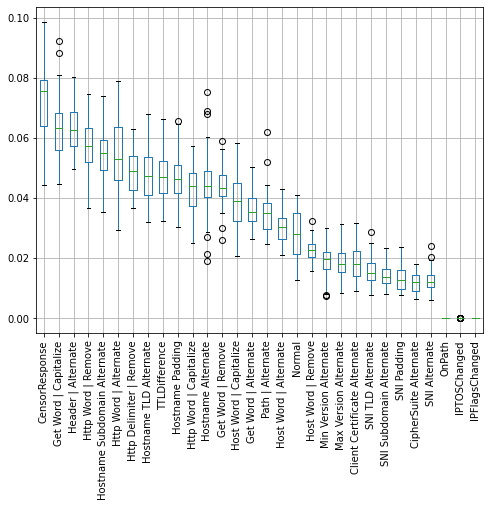

In [74]:
feature_importances.boxplot(rot=90,figsize=(8,6))


In [110]:
# Clustering test
# k=7
from sklearn.cluster import DBSCAN
from sklearn.impute import SimpleImputer

# top_k_features = [x[0] for x in feature_importances[:k]]
top_features = [
    "CensorResponse",
    "Get Word | Capitalize",
    "Header | Alternate",
    "Http Word | Remove",
    "Hostname Subdomain Alternate",
    "Http Word | Alternate",
    "Http Delimiter | Remove",
    "Hostname TLD Alternate",
    "TTLDifference"]
to_cluster = df_data[top_features[2:]]
# to_cluster["CensorResponse"] = LabelEncoder().fit_transform(to_cluster["CensorResponse"])

imp = SimpleImputer(missing_values=np.nan, strategy="mean")
imputed = imp.fit_transform(to_cluster)

# Impute data 
clustering = DBSCAN(eps=0.1, min_samples=10).fit(imputed)

to_cluster["labels"] = clustering.labels_
print(list(to_cluster["labels"].value_counts()))

display(to_cluster.groupby(["labels","DstIP"]).sum())




[413, 272, 257, 141, 119, 98, 44, 33, 32, 27, 25, 24, 20, 13, 10]


/var/folders/7m/46jyljz124v8_cyr2_dkqcxh0000gn/T/ipykernel_46503/1591104490.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_cluster["labels"] = clustering.labels_


Header | Alternate  Http Word | Remove  \
labels DstIP                                                   
-1     104.16.100.49            0.144068            0.000000   
       104.16.117.30            0.000000            0.000000   
       104.16.118.30            0.000000            0.000000   
       104.16.99.49             0.152542            0.002994   
       104.18.109.96            0.000000            0.000000   
...                                  ...                 ...   
 13    31.31.216.123            0.000000            0.000000   
       31.31.216.125            0.000000            0.000000   
       37.208.43.36             0.000000            0.000000   
       86.57.255.37             0.000000            0.000000   
       89.107.99.10             0.000000            0.000000   

                      Hostname Subdomain Alternate  Http Word | Alternate  \
labels DstIP                                                                
-1     104.16.100.49                           0.0                    0.0   
       104.16.117.30                           0.0                    0.0   
       104.16.118.30                           0.0                    0.0   
       104.16.99.49                            0.0                    0.0   
       104.18.109.96                           0.0                    0.0   
...                                            ...                    ...   
 13    31.31.216.123                           0.0                    0.0   
       31.31.216.125                           0.0                    0.0   
       37.208.43.36                            0.0                    0.0   
       86.57.255.37                            0.0                    0.0   
       89.107.99.10                            0.0                    0.0   

                      Http Delimiter | Remove  Hostname TLD Alternate  \
labels DstIP                                                            
-1     104.16.100.49                 0.166667                    0.00   
       104.16.117.30                 0.000000                    0.00   
       104.16.118.30                 0.000000                    0.00   
       104.16.99.49                  0.000000                    0.05   
       104.18.109.96                 0.000000                    0.00   
...                                       ...                     ...   
 13    31.31.216.123                 0.000000                    0.00   
       31.31.216.125                 0.000000                    0.00   
       37.208.43.36                  0.000000                    0.00   
       86.57.255.37                  0.000000                    0.00   
       89.107.99.10                  0.000000                    0.00   

                      TTLDifference  
labels DstIP                         
-1     104.16.100.49           -1.5  
       104.16.117.30           -4.0  
       104.16.118.30           -4.0  
       104.16.99.49            -3.0  
       104.18.109.96           -4.0  
...                             ...  
 13    31.31.216.123           -5.0  
       31.31.216.125           -5.0  
       37.208.43.36            -5.0  
       86.57.255.37            -5.0  
       89.107.99.10            -5.0  

[1528 rows x 7 columns]

'ru'

[[-0.00638148 -0.00121326 -0.00520976 -0.00109052 -0.00466913 -0.00575464
   0.99993728]
 [-0.4304409  -0.11774358 -0.59074047 -0.08714865 -0.30634736 -0.5918787
  -0.01089947]]


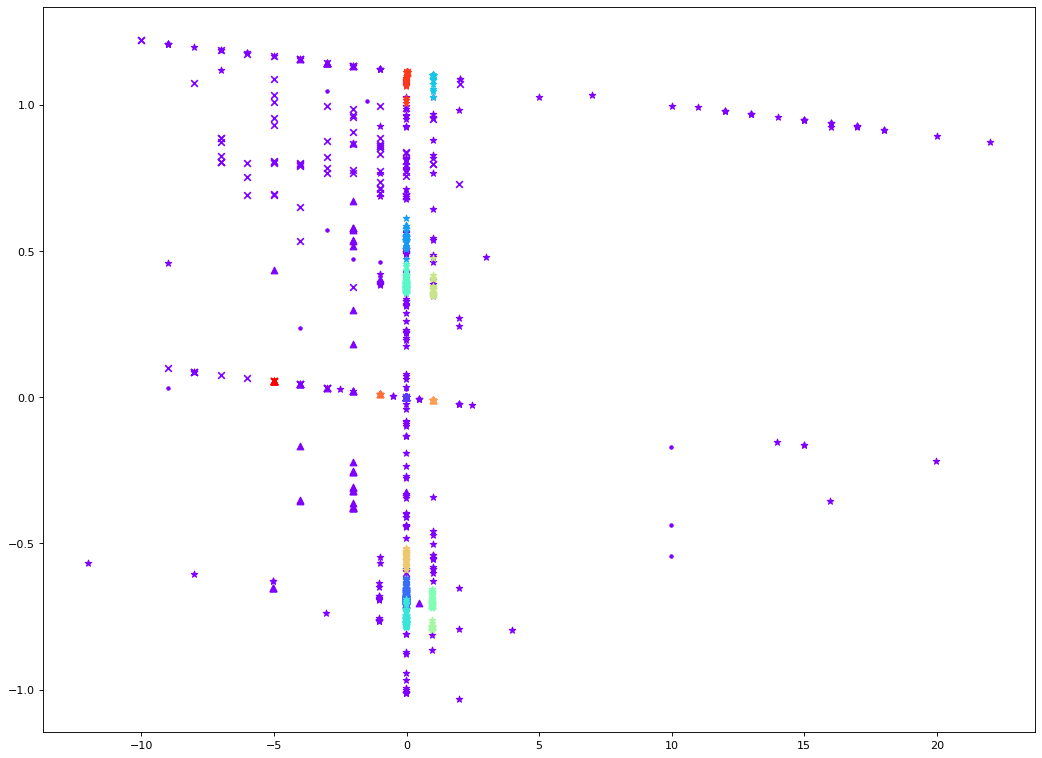

In [111]:
from matplotlib.pyplot import cm
from matplotlib.pyplot import figure

from sklearn.decomposition import PCA

pca = PCA(2)
data = pca.fit_transform(imputed)
# display(data)
country_data = df.groupby(["DstIP"])["Country"].agg(lambda x: pd.Series.mode(x)[0])
cluster_country = to_cluster.join(country_data, on="DstIP")

display(country)
from matplotlib import pyplot as plt
country_marker = (("az", "."), ("kz", "x"), ("by", "^"), ("ru", "*"))

print(pca.components_)

figure(figsize=(16, 12), dpi=80)

n = len(to_cluster["labels"].unique())
color = iter(cm.rainbow(np.linspace(0, 1, n)))
for cluster in to_cluster["labels"].unique():
    c = next(color)
    cluster_indices = to_cluster["labels"] == cluster
#     print(cluster)
#     print(c)
    for country, marker in country_marker:
        country_indices = cluster_country["Country"] == country
        indices = country_indices & cluster_indices
#         for cluster in to_cluster["labels"].unique():
        plt.scatter(data[indices,0], data[indices,1], marker=marker, color=c)

In [260]:
# Ground-truth clusters
df_labels.reset_index().groupby("labels").apply(print)

              DstIP         labels
0    146.158.12.123  a_prod_bitrix
1     146.158.13.57  a_prod_bitrix
3   178.172.137.137  a_prod_bitrix
5    185.179.82.196  a_prod_bitrix
6    185.179.83.187  a_prod_bitrix
18     212.19.3.135  a_prod_bitrix
20  212.233.118.130  a_prod_bitrix
26      5.23.49.190  a_prod_bitrix
30    87.255.25.158  a_prod_bitrix
32   91.210.169.124  a_prod_bitrix
             DstIP          labels
4    185.128.196.8  a_prod_cisco_2
8    185.246.91.95  a_prod_cisco_2
14  195.42.163.203  a_prod_cisco_2
22   31.31.217.178  a_prod_cisco_2
27   62.109.13.196  a_prod_cisco_2
28    81.94.35.213  a_prod_cisco_2
              DstIP             labels
12  194.247.132.144  a_prod_ddos_guard
34    92.53.116.107  a_prod_ddos_guard
            DstIP                  labels
7  185.227.96.113  a_prod_extremenetworks
              DstIP             labels
15  200.111.183.140  a_prod_fortinet_1
16   200.111.183.18  a_prod_fortinet_1
17      202.60.7.12  a_prod_fortinet_1
33     91.220

""
